In [19]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sys
sys.path.append('../../')

import src.viz

#sns.set(style="white", context="notebook")

In [22]:
umap_data = np.load('../../data/toy_model/processed/umap_points.npy')
umap_indices = np.load('../../data/toy_model/processed/umap_indices.npy')
with open('../../data/toy_model/processed/embedding.pkl', "rb") as f:
        emb = pickle.load(f)
umap_cluster_centers = np.load('../../data/toy_model/processed/umap_centers.npy')


(10000, 2)


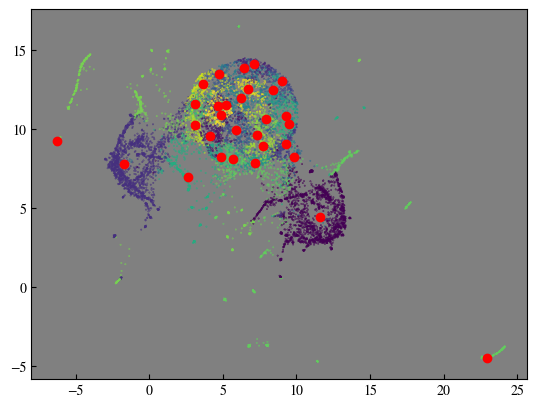

In [23]:
print(umap_data.shape)
plt.scatter(umap_data[:,0],umap_data[:,1],c=emb.labels[umap_indices],s=0.1)
plt.scatter(umap_cluster_centers[:,0],umap_cluster_centers[:,1],c = 'red')
ax = plt.gca()
ax.set_facecolor('grey')

color code the umap according to the slowest relaxing timescale. To do so, we first import the labels, then construct the stochastic matrix, diagonalize it and select the second highest eigenvector.

In [24]:
# find the spectrum of the stochastic matrix
eig_val,eig_vec = np.linalg.eig(emb.P)
real_spectrum = np.real(eig_val)
# sort the eigen system according to the value of the real part
eig_vec = eig_vec[np.argsort(real_spectrum)]
real_spectrum = real_spectrum[np.argsort(real_spectrum)]


Text(0.5, 1.0, '0.527999837050291')

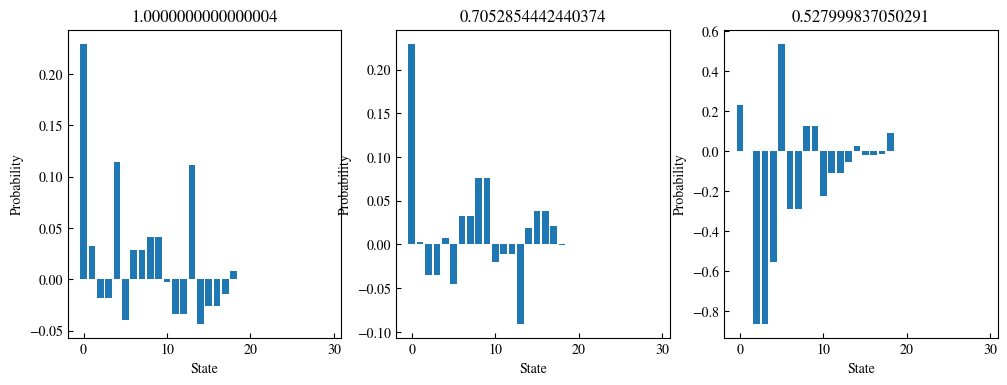

In [25]:
fig,ax = plt.subplots(ncols=3,figsize=(12,4))
src.viz.plot_distribution(np.real(eig_vec[-1]),ax = ax[0])
ax[0].set_title(real_spectrum[-1])
src.viz.plot_distribution(np.real(eig_vec[-2]),ax = ax[1])
ax[1].set_title(real_spectrum[-2])
src.viz.plot_distribution(np.real(eig_vec[-4]),ax = ax[2])
ax[2].set_title(real_spectrum[-4])

In [26]:
# import the original points to color code according to the speed.
#speed,angle,torsion = emb.compute_averages_embedding_chunk()

speed = np.mean(emb.flatten_embedding_matrix[:,0::2],axis=1)
angle = np.mean(emb.flatten_embedding_matrix[:,1::2],axis=1)

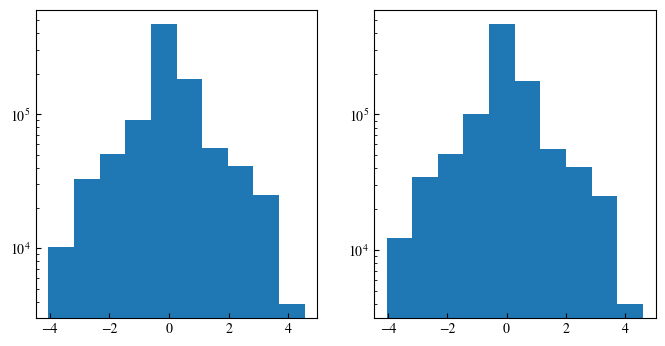

In [27]:
fig,ax = plt.subplots(ncols=2,figsize=(8,4))
ax[0].hist(speed)
ax[1].hist(angle)
#ax[2].hist(torsion)
for i in range(2):
    ax[i].set_yscale('log')

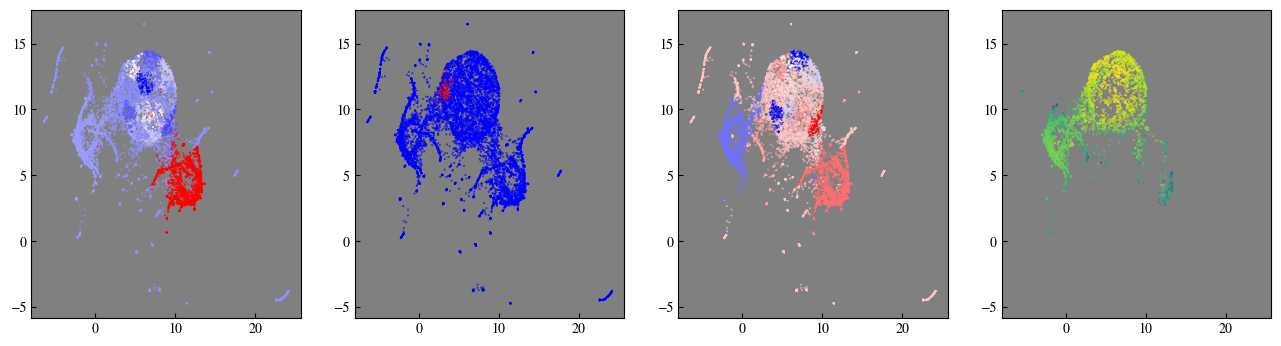

In [28]:
from matplotlib.colors import LogNorm
fig,ax = plt.subplots(ncols=4,figsize=(16,4))
ax[0].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-2][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
ax[1].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-3][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
ax[2].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-4][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
sort = np.argsort(speed[umap_indices])
ax[3].scatter(umap_data[:,0][sort],umap_data[:,1][sort],s=0.1, c = speed[umap_indices][sort], cmap = 'viridis',alpha=1.,norm=LogNorm())
for i in range(4):
    ax[i].set_facecolor('grey')

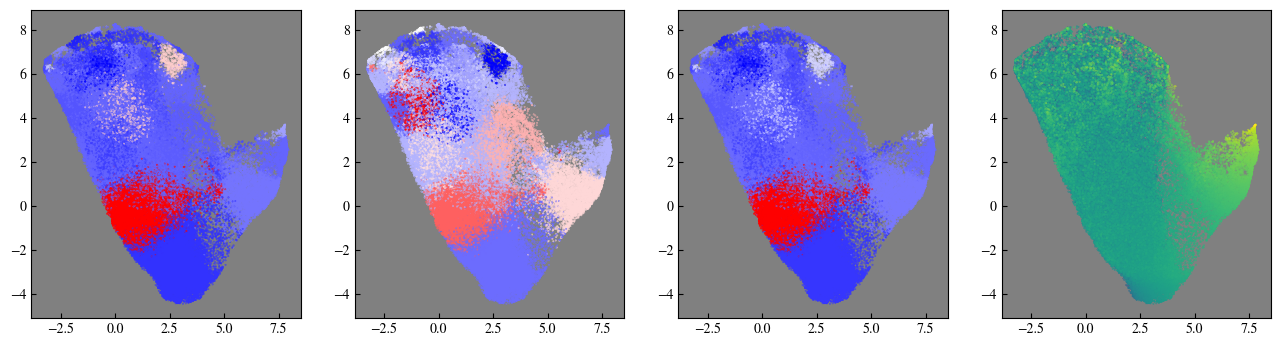

In [22]:
from matplotlib.colors import LogNorm
fig,ax = plt.subplots(ncols=4,figsize=(16,4))
ax[0].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-2][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
ax[1].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-3][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
ax[2].scatter(umap_data[:,0],umap_data[:,1],c=np.real(eig_vec[-4][emb.labels[umap_indices]]),s=0.1,cmap = 'bwr',alpha=1.)
sort = np.argsort(speed[umap_indices])
ax[3].scatter(umap_data[:,0][sort],umap_data[:,1][sort],s=0.1, c = speed[umap_indices][sort], cmap = 'viridis',alpha=1.,norm=LogNorm())
for i in range(4):
    ax[i].set_facecolor('grey')

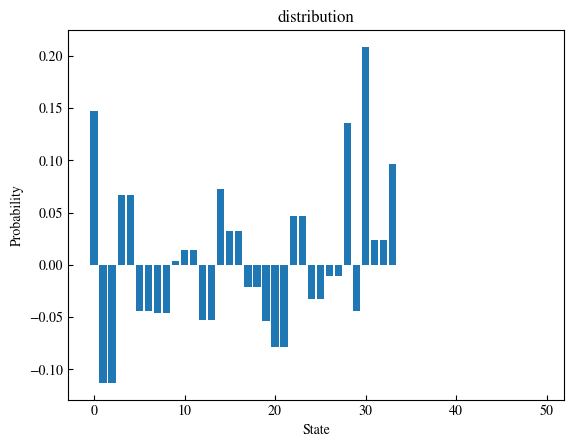